# Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import SPEX_PRISM_lib as SPL

# Read in data line by line

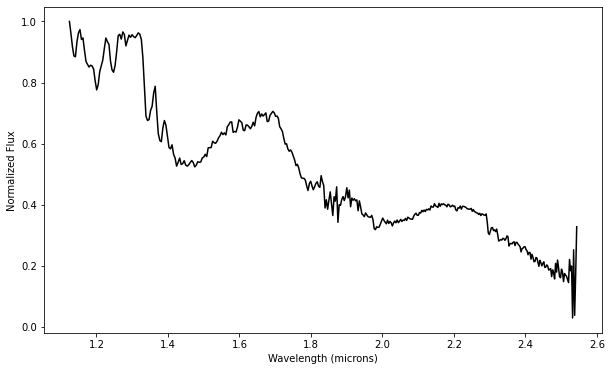

In [3]:
filename = 'PRISM_Spex_1RXS3127B_Phoenix_Lamat.txt'

wav, flux, flux_err = [], [], [] # instantiate data arrays
with open(filename, 'r') as f: # open in read mode
    for line in f:
        row = line.split()
        wav.append(float(row[0]))
        flux.append(float(row[1]))
        flux_err.append(float(row[2]))
wav, flux, flux_err = np.array(wav), np.array(flux), np.array(flux_err)

plt.figure(figsize=(10,6))
plt.errorbar(wav, flux, flux_err, color='k', ecolor='r')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Normalized Flux')
plt.show()

# Read in data with numpy

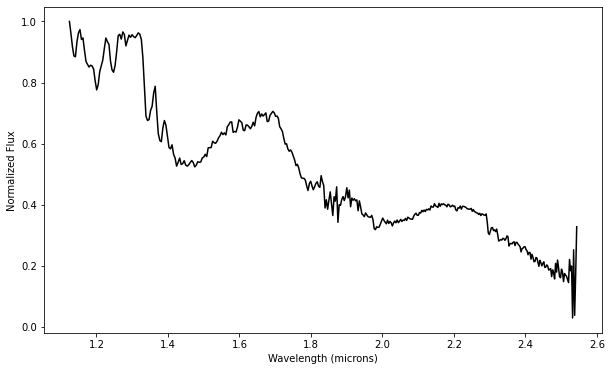

In [4]:
wav, flux, flux_err = np.genfromtxt(filename).T 

plt.figure(figsize=(10,6))
plt.errorbar(wav, flux, flux_err, color='k', ecolor='r')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Normalized Flux')
plt.show()

# Read in data with pandas

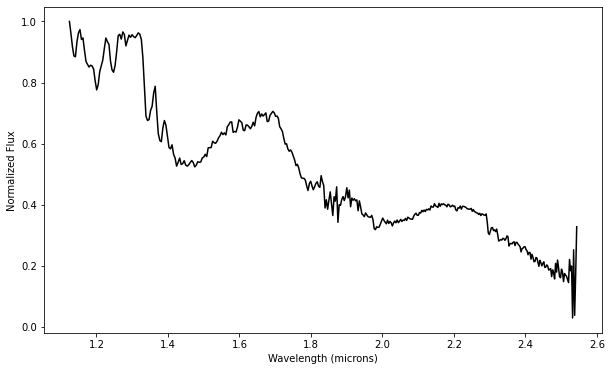

In [5]:
df = pd.read_csv(filename, delim_whitespace=True, comment='#', header=None) # with pandas, there are many ways to customize how to read a table
wav, flux, flux_err = df[0], df[1], df[2]

plt.figure(figsize=(10,6))
plt.errorbar(wav, flux, flux_err, color='k', ecolor='r')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Normalized Flux')
plt.show()

# Interpolate SPEX-PRISM library to wavelength grid of data

Length of data wavelength grid:  403
Length of L0 wavelength grid:  563


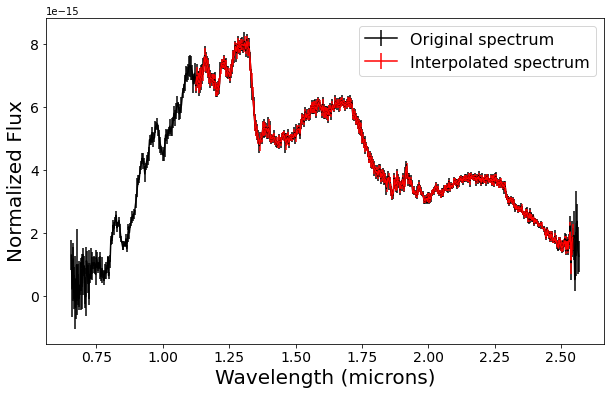

In [18]:
# Read in an L0 spectrum
filenames = SPL.list_SpT_filenames('L0')
wav_L0, flux_L0, err_L0, SpT_L0 = SPL.read_spectrum(filenames[0])
print('Length of data wavelength grid: ', len(wav))
print('Length of L0 wavelength grid: ', len(wav_L0))
flux_L0_interp = SPL.interpolate_xy(wav_L0, flux_L0, wav) # current x, current y, new x
err_L0_interp = SPL.interpolate_xy(wav_L0, err_L0, wav) * np.sqrt(len(wav)/len(wav_L0)) # error needs to be scaled by sampling

plt.figure(figsize=(10,6))
plt.errorbar(wav_L0, flux_L0, err_L0, fmt='-k', label='Original spectrum')
plt.errorbar(wav, flux_L0_interp, err_L0_interp, fmt='-r', label='Interpolated spectrum')
plt.xlabel('Wavelength (microns)', fontsize=20)
plt.ylabel('Normalized Flux', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.show()